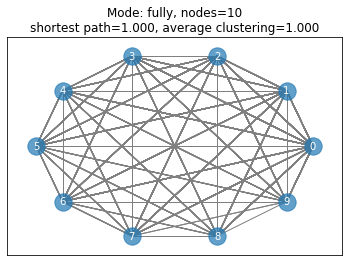

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import glob


mode = 'fully' # choices=['fully', 'nearest_neighbor', 'star', 'random']
node = 10
k = 2
center = 0
probability = 0.5
save = 'True'
speed = 200
# Generate a list of nodes
node = node
nodes = list(range(node))
mode = mode

graph = nx.Graph()
graph.add_nodes_from(nodes)

# Set the labels for each node
labels = {}
for n in graph.nodes():
    labels[n] = str(n)

# Set the mode
edges = []
if mode == 'fully':
    # Append all edges
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            edges.append([i, j])

elif mode == 'nearest_neighbor':
    # Check validity
    k = k
    if 2*k+1 > node:
        raise "Cannot generate the graph! "
    else:
        for i in range(len(nodes)):
            for j in range(k):
                if i < (i+j+1) % node:
                    if [i, (i+j+1) % node] not in edges:
                        edges.append([i, (i+j+1) % node])
                elif i > (i+j+1) % node:
                    if [(i+j+1) % node, i] not in edges:
                        edges.append([(i+j+1) % node, i])

elif mode == 'star':
    # Check validity
    center = center
    if center >= node:
        raise "Cannot generate the graph! "
    else:
        # Connect all the nodes to the center
        for i in range(len(nodes)):
            if i != center:
                edges.append([i, center])

else:
    # Random graph
    probability = probability

    # Possibility should be in 0-1
    if probability > 1 or probability < 0:
        raise "Invalid probability! "
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            # If choice is 1 then add an edge
            choice = np.random.choice([0, 1], p=[1-probability, probability])
            if choice == 1:
                edges.append([i, j])

# Build a figure
fig, ax = plt.subplots(figsize=(6, 4))


def init():
    nx.draw_networkx_nodes(graph, pos=nx.circular_layout(graph), alpha=0.7)
    nx.draw_networkx_labels(graph, pos=nx.circular_layout(graph), labels=labels, font_size=10, font_color='w')


def update(t):
    # Add edges
    graph.add_edge(edges[t][0], edges[t][1])
    nx.draw_networkx_edges(graph, pos=nx.circular_layout(graph), ax=ax, edge_color="gray")
    # Additional parameters
    if mode == 'nearest_neighbor':
        additional = ', k=%d' % k
    elif mode == 'star':
        additional = ', center=%d' % center
    elif mode == 'random':
        additional = ', probability=%.3f' % probability
    else:
        additional = ""

    if t == len(edges)-1:
        shortest_path = nx.average_shortest_path_length(graph)
        avg_clustering = nx.average_clustering(graph)

        ax.set_title("Mode: %s, nodes=%d%s\n"
        "shortest path=%.3f, average clustering=%.3f" % (mode, node, additional, shortest_path, avg_clustering))
    else:
        ax.set_title("Mode: %s, nodes=%d%s\n"
                    % (mode, node, additional))


ani = FuncAnimation(fig, update, init_func=init, frames=len(edges), interval=speed, repeat=False)
if save == "True":
    num = len(glob.glob(r'%s*.gif' % mode))
    ani.save("%s%d.gif" % (mode, num), writer='pillow')

else:
    plt.show()